#### Part1. 기본학습 - AI 핵심이론 및 활용     
    chp05 - 데이터 이해하기      

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Clean_Dataset.csv')
df = df.drop(['Unnamed: 0'], axis=1, inplace=False)
print(df.shape)
df.head()

(300153, 11)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


---
##### Chp.05 - 데이터 이해하기 

In [3]:
# 1.기초통계량 함수: describe( ), value_counts( ), corr( ), crosstab( )

days_left
1    21591.867151
2    30211.299801
3    28976.083569
4    25730.905653
5    26679.773368
Name: price, dtype: float64


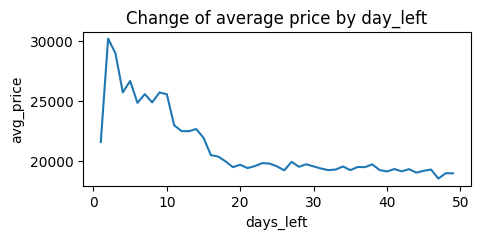

In [4]:
# 2. 출발일까지 남은 날짜(days_left)에 따른 평균 가격변화 시각화 
days_left = df.groupby(['days_left'])['price'].mean()
print(days_left.head())

plt.figure(figsize=(5,2))
days_left.plot()
plt.title('Change of average price by day_left')
plt.xlabel('days_left')
plt.ylabel('avg_price')
plt.show()

In [5]:
# 3. 항공사별 평균 가격 시각화 
airline = df.groupby(['airline'])[['duration', 'days_left', 'price']].mean()
airline

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


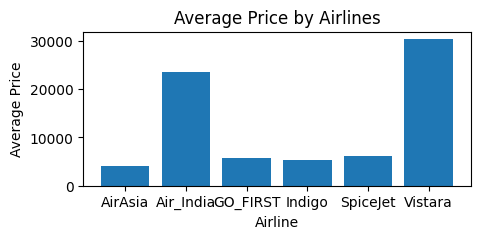

In [6]:
plt.figure(figsize=(5,2))
plt.bar(airline.index, airline['price'])
#airline['price'].plot(kind='bar')
plt.title('Average Price by Airlines')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

<Axes: xlabel='airline'>

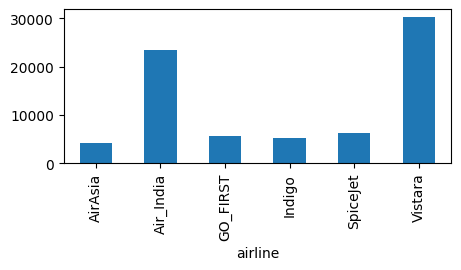

In [7]:
# 참고. 다음과 같이도 가능 
plt.figure(figsize=(5,2))
airline['price'].plot(kind='bar')

In [8]:
# 4. 도착시간의 종류별 비중 시각화 
departure_time = df['departure_time'].value_counts()
departure_time

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

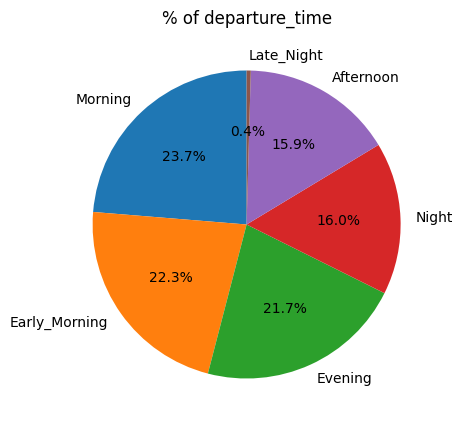

In [9]:
plt.figure(figsize=(5,5))
plt.pie(departure_time.values, labels=departure_time.index, autopct='%.1f%%', startangle=90)
#departure_time.plot(kind='pie', autopct='%.1f%%', startangle=90)

plt.title('% of departure_time')
plt.show()

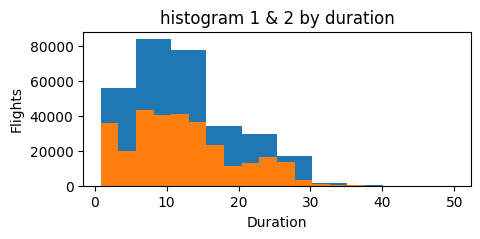

In [10]:
# 5. 비행시간을 구간구분하여 히스토그램 시각화 (2개를 겹치게)
plt.figure(figsize=(5,2))

plt.hist(df['duration'], bins = 10)
plt.hist(df['duration'], bins = 20)
#df['duration'].plot(kind='hist', bins=10)
#df['duration'].plot(kind='hist', bins=20)

plt.title('histogram 1 & 2 by duration')
plt.xlabel('Duration')
plt.ylabel('Flights')
plt.show()

<Axes: >

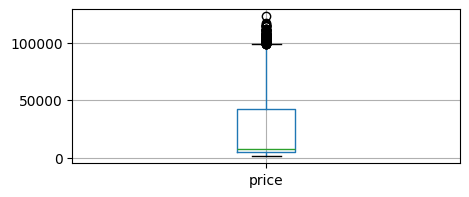

In [11]:
# 6. 가격의 분포를 boxplot으로 시각화 
df.boxplot(column='price', figsize=(5,2))

<Axes: title={'center': 'price'}, xlabel='departure_time'>

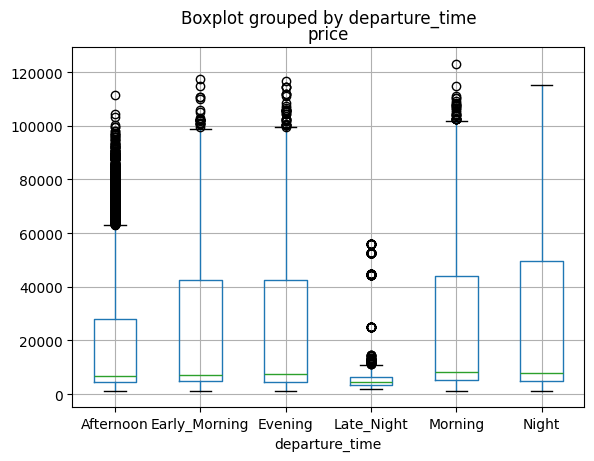

In [12]:
df.boxplot(by='departure_time', column='price')

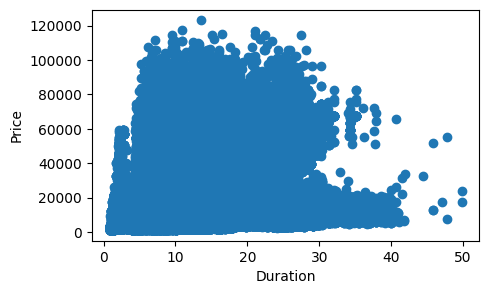

In [13]:
# 7. 비행시간과 가격의 산점도 시각화 
plt.figure(figsize=(5,3))
plt.scatter(x=df['duration'], y=df['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

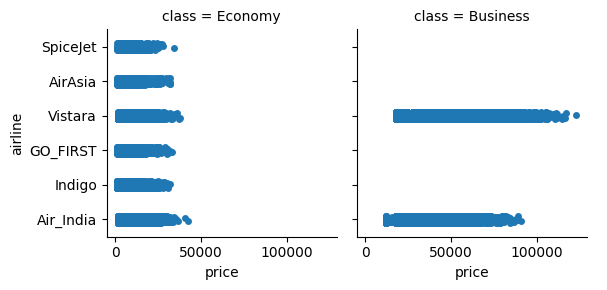

In [31]:
# 8. 항공사 x 좌석등급별 가격분포 (categorical plot)
sns.catplot(data=df, x='price', y='airline', col='class', height=3)

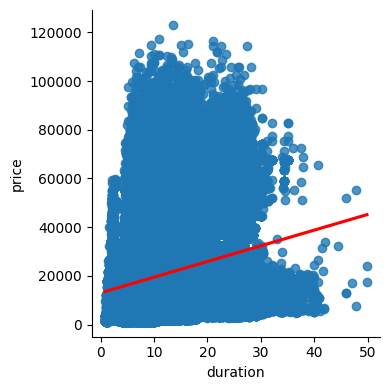

In [34]:
# 9. 선형 회귀선 
sns.lmplot(data=df, x='duration', y='price', line_kws={'color':'red'}, height=4)

<Axes: xlabel='airline', ylabel='count'>

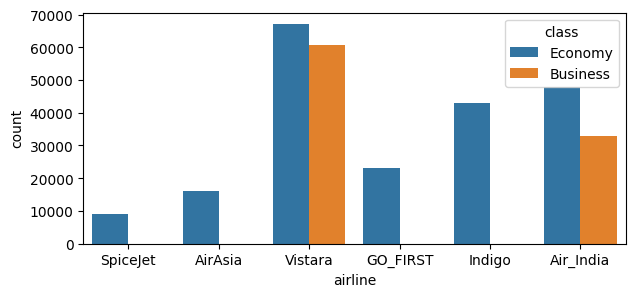

In [25]:
# 10. count plot 
plt.figure(figsize=(7, 3)) 
sns.countplot(data=df, x='airline', hue='class')

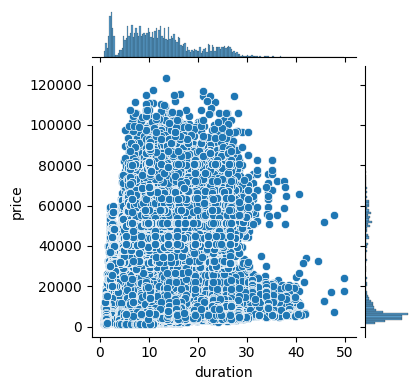

In [33]:
# 11. joint plot 
sns.jointplot(data=df, x='duration', y='price', height=4)

           duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


<Axes: >

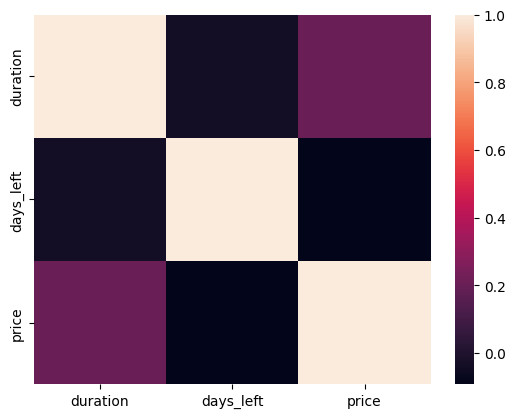

In [42]:
# 12. heat map
new_df = df[['duration', 'days_left', 'price']]
print(new_df.corr())

sns.heatmap(new_df.corr())